# Engenharia do Conhecimento 2023/2024

## TP08: Feature Selection, Dimensionality Reduction and Model Tuning
*A Machine Learning Tutorial by Andre Falcao (DI/FCUL 2020-2022), 
*revised by Catia Pesquita (DI/FCUL 2022-2023), Luís Correia (23/24)*

### Summary

1. Feature selection
    1. Using correlation
    2. Using stepwise methods
    3. Random Forests for Feature Selection
2. Principal Components analysis
    1. Linear PCA
    2. Kernel PCA
3. Model Tuning


## 1. Feature selection

### 1.1 Correlation

We are going to start by getting our favourite libraries and our dataset arranged for Binary Classification

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#from sklearn import tree
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import f1_score #, confusion_matrix
from sklearn.metrics import r2_score #, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

Now get the diabetes dataset

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

# Convert to a pandas dataframe
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
# Add the target variable to the dataframe
df['target'] = diabetes.target

Let's make a simple evaluation function running 2 regression algorithms and producing the R2 for each

In [3]:
# train-test split
train, test = train_test_split(df, test_size=0.2, random_state=0)

def naive_model_testing(train, test):
    
    #test 2 models, DTs and LR, and print out the results
    dtr= DecisionTreeRegressor(max_depth=5)
    dtr.fit(train.drop('target', axis=1), train['target'])

    lmr=LinearRegression()
    lmr.fit(train.drop('target', axis=1), train['target'])

   # rf_preds=rfr.predict(X_test)
    dt_preds=dtr.predict(test.drop('target', axis=1))
    lr_preds=lmr.predict(test.drop('target', axis=1))

   # print("RVE RFs: %7.4f" % explained_variance_score(y_test, rf_preds))
    print("R2 Decision Tree Regression: %7.4f" % r2_score(test['target'], dt_preds))
    print("R2 Linear Regression: %7.4f" % r2_score(test['target'], lr_preds))

naive_model_testing(train, test)


R2 Decision Tree Regression:  0.0755
R2 Linear Regression:  0.3322


### Correlation 

As a first exercise we are going to use the Spearman correlation

In [4]:
spear = df.corr(method='spearman')
spear

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.177463,0.200554,0.350859,0.262524,0.221711,-0.106973,0.221017,0.265176,0.296235,0.197822
sex,0.177463,1.000000,0.098079,0.261508,0.027790,0.134695,-0.394584,0.337524,0.174625,0.203277,0.037401
bmi,0.200554,0.098079,1.000000,0.397985,0.287829,0.295494,-0.371172,0.459068,0.491609,0.384664,0.561382
bp,0.350859,0.261508,0.397985,1.000000,0.275224,0.205638,-0.191033,0.280799,0.396071,0.381219,0.416241
s1,0.262524,0.027790,0.287829,0.275224,1.000000,0.878793,0.015308,0.520674,0.512864,0.332173,0.232429
s2,0.221711,0.134695,0.295494,0.205638,0.878793,1.000000,-0.197435,0.652283,0.349947,0.286483,0.195834
s3,-0.106973,-0.394584,-0.371172,-0.191033,0.015308,-0.197435,1.000000,-0.789694,-0.450420,-0.290863,-0.410022
s4,0.221017,0.337524,0.459068,0.280799,0.520674,0.652283,-0.789694,1.000000,0.640390,0.413700,0.448931
s5,0.265176,0.174625,0.491609,0.396071,0.512864,0.349947,-0.450420,0.640390,1.000000,0.453023,0.589416
s6,0.296235,0.203277,0.384664,0.381219,0.332173,0.286483,-0.290863,0.413700,0.453023,1.000000,0.350792


### Exercise 1

1. Identify the Top 5 most correlated variables to the y
2. Check if this variable selection is capable of better results than using all variables

In [5]:
# Exercise 1.1
#Positive Correlations: Values close to 1 indicate a strong positive correlation between the two variables. This means that as one variable increases, the other tends to also increase.
#Negative Correlations: Values close to -1 indicate a strong negative correlation between the two variables. This means that as one variable increases, the other tends to decrease.
#Weak Correlations: Values close to 0 indicate weak or no correlation between the variables.


#the top 5 are bmi, s5, s4,bp,s3



In [6]:
# Exercise 1.2


selected_variables = ['bmi', 's5', 's4', 'bp', 's3']
X_selected = df[selected_variables]
y = df['target']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)

# Add 'target' column back to the training and testing datasets
X_train['target'] = y_train
X_test['target'] = y_test

def naive_model_testing(train, test):
    
    # Test 2 models, Decision Tree and Linear Regression, and print out the results
    dtr = DecisionTreeRegressor(max_depth=5)
    dtr.fit(train.drop('target', axis=1), train['target'])

    lmr = LinearRegression()
    lmr.fit(train.drop('target', axis=1), train['target'])

    dt_preds = dtr.predict(test.drop('target', axis=1))
    lr_preds = lmr.predict(test.drop('target', axis=1))

    print("R2 Decision Tree Regression: %7.4f" % r2_score(test['target'], dt_preds))
    print("R2 Linear Regression: %7.4f" % r2_score(test['target'], lr_preds))


naive_model_testing(X_train, X_test)

R2 Decision Tree Regression:  0.0034
R2 Linear Regression:  0.3207


In [7]:
# Exercise 1.extra
# run previous cell multiple times and observe that DTs score may change.  Why? 

# Exercise 1.2


selected_variables = ['bmi', 's5', 's4', 'bp', 's3']
X_selected = df[selected_variables]
y = df['target']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)

# Add 'target' column back to the training and testing datasets
X_train['target'] = y_train
X_test['target'] = y_test

def naive_model_testing(train, test):
    
    # Test 2 models, Decision Tree and Linear Regression, and print out the results
    dtr = DecisionTreeRegressor(max_depth=5)
    dtr.fit(train.drop('target', axis=1), train['target'])

    lmr = LinearRegression()
    lmr.fit(train.drop('target', axis=1), train['target'])

    dt_preds = dtr.predict(test.drop('target', axis=1))
    lr_preds = lmr.predict(test.drop('target', axis=1))

    print("R2 Decision Tree Regression: %7.4f" % r2_score(test['target'], dt_preds))
    print("R2 Linear Regression: %7.4f" % r2_score(test['target'], lr_preds))


naive_model_testing(X_train, X_test)

#------------------------------------------------------------------------------------------
# Exercise 1.extra
# run previous cell multiple times and observe that DTs score may change.  Why? 

# Exercise 1.2


selected_variables = ['bmi', 's5', 's4', 'bp', 's3']
X_selected = df[selected_variables]
y = df['target']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)

# Add 'target' column back to the training and testing datasets
X_train['target'] = y_train
X_test['target'] = y_test

def naive_model_testing(train, test):
    
    # Test 2 models, Decision Tree and Linear Regression, and print out the results
    dtr = DecisionTreeRegressor(max_depth=5)
    dtr.fit(train.drop('target', axis=1), train['target'])

    lmr = LinearRegression()
    lmr.fit(train.drop('target', axis=1), train['target'])

    dt_preds = dtr.predict(test.drop('target', axis=1))
    lr_preds = lmr.predict(test.drop('target', axis=1))

    print("R2 Decision Tree Regression: %7.4f" % r2_score(test['target'], dt_preds))
    print("R2 Linear Regression: %7.4f" % r2_score(test['target'], lr_preds))


naive_model_testing(X_train, X_test)


##----------------------------answer
#Non-parametric algorithms often rely more heavily on the training data during prediction, 
#as they may use the entire dataset or a subset of it to make predictions.

#Decision Trees, on the other hand, are non-parametric models that partition the feature space 
#based on data-driven rules. The splits made by Decision Trees depend on the algorithm's heuristic 
#decisions at each node, such as selecting the feature and threshold that optimize certain criteria
#(e.g., information gain, Gini impurity). Because of this data-driven and heuristic nature, small 
#changes in the training data, random initialization, or hyperparameters can lead to different tree 
#structures and thus different model performance.


R2 Decision Tree Regression:  0.0085
R2 Linear Regression:  0.3207
R2 Decision Tree Regression: -0.0072
R2 Linear Regression:  0.3207


### 1.2. Stepwise Feature selection

Here we are going to use the [Sequential Feature Selector form scikit](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector) which takes any supervised method and runs the forward or the backward methods for defining the most relevant variables

By default it uses the forward method and we are going to select the best 5 features

In [8]:
from sklearn.feature_selection import SequentialFeatureSelector

N, M = train.shape
M = M-1  # to have the data shape without target
print('shape: ', N, 'x', M)

shape:  353 x 10


In [9]:
#using linear regression for sequential feature selection
lmr=LinearRegression()
sfs = SequentialFeatureSelector(lmr, n_features_to_select=5).set_output(transform="pandas")
sfs.fit(train.drop('target', axis=1), train['target'])

#get the relevant columns
features=sfs.get_support()
Features_selected =np.arange(M)[features]
print("The features selected are columns: ", Features_selected)

n_train=sfs.transform(train.drop('target', axis=1))
n_test=sfs.transform(test.drop('target', axis=1))

n_train['target'] = train['target']  # form the train dataframe to pass to the metrics function
n_test['target'] = test['target']  # form the test dataframe to pass to the metrics function

naive_model_testing(n_train, n_test)

The features selected are columns:  [1 2 3 4 8]
R2 Decision Tree Regression:  0.0381
R2 Linear Regression:  0.3120


### Exercise 2

1. Run forward sequential fitting for a decision tree with max_depth=3

2. Change the direction to "backward"

In [10]:
#Exercise 2.1
dt = DecisionTreeRegressor(max_depth=3)
sfs_dt = SequentialFeatureSelector(dt, n_features_to_select=5, direction='forward').set_output(transform="pandas")
sfs_dt.fit(train.drop('target', axis=1), train['target'])

#get the relevant columns
features=sfs_dt.get_support()
Features_selected =np.arange(M)[features]
print("The features selected are columns: ", Features_selected)

n_train=sfs_dt.transform(train.drop('target', axis=1))
n_test=sfs_dt.transform(test.drop('target', axis=1))

n_train['target'] = train['target']  # form the train dataframe to pass to the metrics function
n_test['target'] = test['target']  # form the test dataframe to pass to the metrics function

naive_model_testing(n_train, n_test)

The features selected are columns:  [0 1 2 7 8]
R2 Decision Tree Regression:  0.1461
R2 Linear Regression:  0.2823


In [11]:
#Exercise 2.2
#Exercise 2.1
dt = DecisionTreeRegressor(max_depth=3)
sfs_dt = SequentialFeatureSelector(dt, n_features_to_select=5, direction='backward').set_output(transform="pandas")
sfs_dt.fit(train.drop('target', axis=1), train['target'])

#get the relevant columns
features=sfs_dt.get_support()
Features_selected =np.arange(M)[features]
print("The features selected are columns: ", Features_selected)

n_train=sfs_dt.transform(train.drop('target', axis=1))
n_test=sfs_dt.transform(test.drop('target', axis=1))

n_train['target'] = train['target']  # form the train dataframe to pass to the metrics function
n_test['target'] = test['target']  # form the test dataframe to pass to the metrics function

naive_model_testing(n_train, n_test)


The features selected are columns:  [0 1 2 7 8]
R2 Decision Tree Regression:  0.1538
R2 Linear Regression:  0.2823


## 2. Principal Components Analysis

We are now going to use the [PCA module](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) from scikit-learn

First let's just find a 2D projection of our data (remember to use only the training set)


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).set_output(transform="pandas") #finding the two best PCs
pca.fit(train.drop('target', axis=1))
tve=0 #total variance explained
for i, ve in enumerate(pca.explained_variance_ratio_):
    tve+=ve
    print("PC%d - Variance explained: %7.4f - Total Variance: %7.4f" % (i, ve, tve) )
print()
print("Actual Eigenvalues:", pca.singular_values_)
for i,comp in enumerate(pca.components_):
    print("PC",i, "-->", comp)
    

PC0 - Variance explained:  0.4154 - Total Variance:  0.4154
PC1 - Variance explained:  0.1402 - Total Variance:  0.5556

Actual Eigenvalues: [1.83741142 1.06757328]
PC 0 --> [ 0.23407134  0.17993547  0.31108607  0.27430238  0.33194466  0.33280716
 -0.28414879  0.42177706  0.38377357  0.33756638]
PC 1 --> [-0.06064859  0.37808356  0.17547633  0.15725858 -0.57785175 -0.47586989
 -0.47371054  0.04251347  0.03067198  0.10167466]


### Exercise 3

1. Interpret the results above. 
   
2. What is the meaning of the PC vectors?

In [13]:
# Exercise 3.1 
#PC0:  explains 41.54% of the total variance in the dataset.
#PC1: explains 14.02% of the total variance in the dataset.

#Eigenvalues represent the amount of variance captured by each principal component. 
#In this case, the eigenvalues associated with PC0 and PC1 are approximately 1.8374 and 1.0676, respectively.
# Exercise 3.2 

#PC0 Vector: The vector associated with PC0 indicates the direction in the original feature space that corresponds 
#to the maximum variance. Each element of the vector represents the contribution of the corresponding original feature to PC0.
#For example, the first element (0.2341) suggests that the first feature contributes positively to the variance captured by PC0.


# if a feature has a positive coefficient for a particular principal component, an increase in that feature's value will lead 
#to an increase in the value of the principal component.

#if a feature has a negative coefficient for a particular principal component, an increase in that feature's value will lead 
#to a decrease in the value of the principal component.

Now let's project the data using the principal components defined and use them for regression

In [14]:
n_train=pca.transform(train.drop('target', axis=1))
n_test=pca.transform(test.drop('target', axis=1))
n_train['target'] = train['target']  # form the train dataframe to pass to the metrics function
n_test['target'] = test['target']  # form the test dataframe to pass to the metrics function
naive_model_testing(n_train, n_test)

R2 Decision Tree Regression: -0.0039
R2 Linear Regression:  0.2593


quite poor results as expected

### A graphical view illustrated with binary classification data

We consider now the same data as a classification problem, assuming that patients with a target value of 250 or more means they have diabetes and with less that 250 they don't

In [15]:
# with binary classified instances
# target values of 250 or more indicate diabetes
yc_diabetes=np.array([int(i>=250) for i in diabetes.target]) # to be used in graphics ahead

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, yc_diabetes, test_size=0.2, random_state=23)
print("training set patients with target value >=250: ", (y_train).sum())
print("training set patients with target value <250: ", len(y_train) - (y_train).sum())

training set patients with target value >=250:  45
training set patients with target value <250:  308


Let's plot the projection in 2 components 

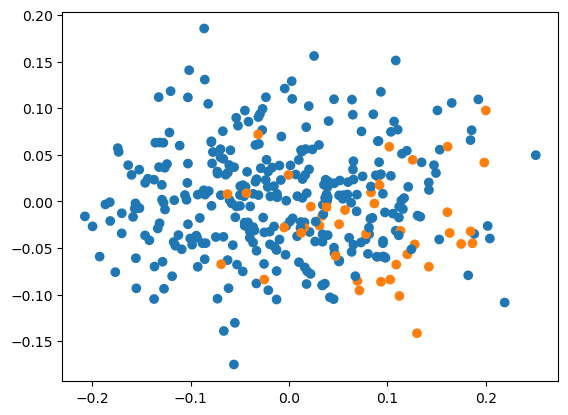

In [16]:
pca = PCA(n_components=2) #finding the two best PCs
pca.fit(X_train)
nX_train=pca.transform(X_train)
nX_test=pca.transform(X_test)
colors=np.array(["tab:blue", "tab:orange"])[y_train]
plt.scatter(nX_train[:,0], nX_train[:,1], c=colors)
plt.show()

also as a classification problem we can see it is hard to discriminate the two classes using only the two PCs

## 3. Model Tuning

For this example we are going to use Support Vector Classifiers, but any model learned so far can be used

We are going to use first [Scikit-Learn's GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), an implementation of extensive parameter search. In its basic form it just requires:
* a bare bones model constructor 
* a dictionary containing the parameters to search for. The keys of the dictionary should correspond to the parameter to test and the values to a list of possible values to test
* a scoring function defining what is the criterion to select and rank the best models
* GridSearchCV uses by default 5-Fold Cross validation, but other validation criteria can be used

The result of GridSearchCV is a structure that contains the fitted models that can then be used for learning and application

Tet's try it with the C and gamma values for support vector classification

In [46]:
from time import time
#from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import scipy.stats as stats

#make the dictionary with the testing parameters
#gammas = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
#Cs = [1, 10, 100, 1e3, 1e4, 1e5]
#param_grid = {'gamma': gammas, 'C': Cs}
depths = [3, 5, 10, 15]
m_sampl_split = [2, 5, 9]
prune_a = [0.0, 0.0001, 0.001, 0.01]
param_grid = {'max_depth': depths, 'min_samples_split': m_sampl_split, 'ccp_alpha': prune_a}

#define the model and do the grid search
#clf = SVC() # RBF (Gaussian) by default
clf = DecisionTreeClassifier(criterion='log_loss', random_state=23)
gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring="f1")

start = time()
gs=gs.fit(X_train, y_train)
print(
    'GridSearchCV took %.2f seconds for %d candidate parameter settings.'
    % ((time() - start), len(gs.cv_results_['params']))
)

GridSearchCV took 0.80 seconds for 48 candidate parameter settings.


Let's identify the best element parameters [best according to the scoring function, in this case it is the F1 score]

In [47]:
#print('best gamma: %7.4f' % gs.best_estimator_.gamma)
#print('best C: %3.2f' %  gs.best_estimator_.C)
print('best maximum depth: %2.0f' % gs.best_estimator_.max_depth)
print('best minimum samples to split a node: %2.0f' %  gs.best_estimator_.min_samples_split)
print('best minimal cost pruning parameter: %1.4f' % gs.best_estimator_.ccp_alpha)

best maximum depth: 10
best minimum samples to split a node:  5
best minimal cost pruning parameter: 0.0000


Just for sake of completion, we can use the best estimator model (the one with the optimized parameters) for prediction on the test set.

In [48]:
preds=gs.best_estimator_.predict(X_test)
print('F1 : %7.4f' % f1_score(y_test, preds))
print('number of leaves:', gs.best_estimator_.get_n_leaves())

F1 :  0.4000
number of leaves: 28


GridSearchCV gives you a number of statistics on the tests it runs:

In [49]:
for i in gs.cv_results_.keys(): print(i)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_ccp_alpha
param_max_depth
param_min_samples_split
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


We can print the results in a nice Pandas Data Frame

In [50]:
grid_res = pd.DataFrame(gs.cv_results_)
grid_res.sort_values(by=['rank_test_score'], ascending=True, inplace=True) #sort the tested models by score
grid_res[['params', 'rank_test_score', 'mean_test_score', 'std_test_score', 'mean_fit_time', 'std_fit_time']] #show only mean and std of the test score

,params,rank_test_score,mean_test_score,std_test_score,mean_fit_time,std_fit_time
34,"{'ccp_alpha': 0.001, 'max_depth': 15, 'min_sam...",1,0.374544,0.141485,0.002004,8.823420e-06
31,"{'ccp_alpha': 0.001, 'max_depth': 10, 'min_sam...",1,0.374544,0.141485,0.002006,1.335621e-05
7,"{'ccp_alpha': 0.0, 'max_depth': 10, 'min_sampl...",1,0.374544,0.141485,0.001770,3.890976e-04
22,"{'ccp_alpha': 0.0001, 'max_depth': 15, 'min_sa...",1,0.374544,0.141485,0.001599,4.896879e-04
10,"{'ccp_alpha': 0.0, 'max_depth': 15, 'min_sampl...",1,0.374544,0.141485,0.001610,4.985166e-04
19,"{'ccp_alpha': 0.0001, 'max_depth': 10, 'min_sa...",1,0.374544,0.141485,0.001848,4.346740e-04
43,"{'ccp_alpha': 0.01, 'max_depth': 10, 'min_samp...",7,0.335819,0.172793,0.001600,4.896293e-04
46,"{'ccp_alpha': 0.01, 'max_depth': 15, 'min_samp...",7,0.335819,0.172793,0.001600,4.896095e-04
23,"{'ccp_alpha': 0.0001, 'max_depth': 15, 'min_sa...",9,0.324655,0.153176,0.001603,4.921891e-04
44,"{'ccp_alpha': 0.01, 'max_depth': 10, 'min_samp...",9,0.324655,0.153176,0.001587,5.055494e-04


we can check if the 2nd best model produces different results 

In [51]:
print('max_depth:', grid_res.loc[1, 'param_max_depth'],
      'min_samples_split:', grid_res.loc[1, 'param_min_samples_split'],
      'ccp_alpha:', '{:.2e}'.format(grid_res.loc[1, 'param_ccp_alpha']))
clf = DecisionTreeClassifier(criterion='log_loss', random_state=23,
                             max_depth=grid_res.loc[1, 'param_max_depth'],
                             min_samples_split=grid_res.loc[1, 'param_min_samples_split'],
                             ccp_alpha=grid_res.loc[1, 'param_ccp_alpha'])
clf.fit(X_train, y_train)
preds=clf.predict(X_test)
print('F1 : %7.4f' % f1_score(y_test, preds))
print('number of leaves:', clf.get_n_leaves())

max_depth: 3 min_samples_split: 5 ccp_alpha: 0.00e+00
F1 :  0.0870
number of leaves: 8


Let's try now the RandomizedSearchCV and compare to the previous one.

In [52]:
# configure randomized search (by default also 5-fold CV)
# notice the loguniform distributions

param_dist = {
 #   'C': stats.loguniform(1, 1e5),
 #  'gamma': stats.loguniform(1e-7, 1e-1),
    'max_depth': stats.randint(3, 16),
    'min_samples_split': stats.randint(2, 10),
    'ccp_alpha': stats.loguniform(1e-5, 0.01)
}

n_iter_search = 15
rs = RandomizedSearchCV(
    clf, param_distributions=param_dist, n_iter=n_iter_search
)

start = time()
rs = rs.fit(X_train, y_train)
print(
    'RandomizedSearchCV took %.2f seconds for %d candidates parameter settings'
    % ((time() - start), n_iter_search)
)

RandomizedSearchCV took 0.18 seconds for 15 candidates parameter settings


In [53]:
print('best maximum depth: %2.0f' % gs.best_estimator_.max_depth)
print('best minimum samples to split a node: %2.0f' %  gs.best_estimator_.min_samples_split)
print('best minimal cost pruning parameter: %1.4f' % gs.best_estimator_.ccp_alpha)

best maximum depth: 10
best minimum samples to split a node:  5
best minimal cost pruning parameter: 0.0000


Now we can use the best estimator model (the one with the optimized parameters) for prediction

In [54]:
preds=rs.best_estimator_.predict(X_test)
print('F1 : %7.4f' % f1_score(y_test, preds))
print('number of leaves:', rs.best_estimator_.get_n_leaves())

F1 :  0.0870
number of leaves: 8


In [55]:
rand_res = pd.DataFrame(rs.cv_results_)
rand_res.sort_values(by=['rank_test_score'], ascending= True, inplace=True) #sort the tested models by score
rand_res[['params', 'rank_test_score', 'mean_test_score', 'std_test_score', 'mean_fit_time', 'std_fit_time']] #show only mean and std of the test score

,params,rank_test_score,mean_test_score,std_test_score,mean_fit_time,std_fit_time
8,"{'ccp_alpha': 0.0005472507638100905, 'max_dept...",1,0.864024,0.019087,0.001003,0.000006
0,"{'ccp_alpha': 0.001225578461575093, 'max_depth...",2,0.849698,0.032562,0.001645,0.000532
6,"{'ccp_alpha': 0.007416920788634353, 'max_depth...",2,0.849698,0.032562,0.001601,0.000491
14,"{'ccp_alpha': 0.003733189481334963, 'max_depth...",4,0.844064,0.035205,0.002001,0.000008
2,"{'ccp_alpha': 0.0014146561130373278, 'max_dept...",5,0.841368,0.038429,0.001645,0.000532
9,"{'ccp_alpha': 0.00541772670866229, 'max_depth'...",6,0.841328,0.032965,0.001476,0.000450
11,"{'ccp_alpha': 0.002313839906122468, 'max_depth...",6,0.841328,0.032965,0.001918,0.000518
1,"{'ccp_alpha': 0.00034740866661805736, 'max_dep...",8,0.835694,0.030552,0.001601,0.000489
3,"{'ccp_alpha': 4.19392114646052e-05, 'max_depth...",9,0.835614,0.029551,0.001402,0.000488
5,"{'ccp_alpha': 0.00011771529476948398, 'max_dep...",10,0.832716,0.034598,0.001883,0.000470


checking the 2nd best model 

In [56]:
print('max_depth:', rand_res.loc[1, 'param_max_depth'],
      ', min_samples_split:', rand_res.loc[1, 'param_min_samples_split'],
      ', ccp_alpha:', '{:.2e}'.format(rand_res.loc[1, 'param_ccp_alpha']))
clf = DecisionTreeClassifier(criterion='log_loss', random_state=23,
                             max_depth=rand_res.loc[1, 'param_max_depth'],
                             min_samples_split=rand_res.loc[1, 'param_min_samples_split'],
                             ccp_alpha=rand_res.loc[1, 'param_ccp_alpha'])
clf.fit(X_train, y_train)
preds=clf.predict(X_test)
print('F1 : %7.4f' % f1_score(y_test, preds))
print('number of leaves:', clf.get_n_leaves())


max_depth: 15 , min_samples_split: 4 , ccp_alpha: 3.47e-04
F1 :  0.3529
number of leaves: 30


### Exercise 4
1. Discuss the values above in terms of coherency of the parameters found. Do you find a pattern in the best values for C and gamma?
2. Compare the first 3 models results using the testing set and discuss your findings [Optional]


In [44]:
# Exercise 4.1

# gs best extimator F1 :  0.4000
#best maximum depth: 10
#best minimum samples to split a node:  5
#best minimal cost pruning parameter: 0.0000




#rs best estimator  F1 :  0.0870
#best maximum depth: 10
#best minimum samples to split a node:  5
#best minimal cost pruning parameter: 0.0000


#Both the grid search and randomized search found the same best values for hyperparameters
#Despite both models having the same best hyperparameter values, there is a notable difference in their performance.
#The grid search model outperforms the randomized search model by a considerable margin in terms of the F1 score.


#    The fact that both search methods converged to the same best hyperparameter values indicates that these values 
#are likely optimal for the given dataset and task.
# The substantial difference in performance between the two models suggests that the specific combinations of 
#hyperparameters found by the grid search were more effective in capturing the underlying patterns in the data.
# It's possible that the randomized search did not explore the hyperparameter space as thoroughly as the grid search,
#leading to suboptimal performance.

In [59]:
# Exercise 4.1
from time import time
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import scipy.stats as stats

#make the dictionary with the testing parameters
gammas = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
Cs = [1, 10, 100, 1e3, 1e4, 1e5]
param_grid = {'gamma': gammas, 'C': Cs}

#define the model and do the grid search
clf = SVC() # RBF (Gaussian) by default

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring="f1")

start = time()
gs=gs.fit(X_train, y_train)
print(
    'GridSearchCV took %.2f seconds for %d candidate parameter settings.'
    % ((time() - start), len(gs.cv_results_['params']))
)
print('best gamma: %7.4f' % gs.best_estimator_.gamma)
print('best C: %3.2f' %  gs.best_estimator_.C)
preds=gs.best_estimator_.predict(X_test)
print('F1 : %7.4f' % f1_score(y_test, preds))



# configure randomized search (by default also 5-fold CV)
# notice the loguniform distributions

param_dist = {
    'C': stats.loguniform(1, 1e5),
   'gamma': stats.loguniform(1e-7, 1e-1),
    
}

n_iter_search = 15
rs = RandomizedSearchCV(
    clf, param_distributions=param_dist, n_iter=n_iter_search
)

start = time()
rs = rs.fit(X_train, y_train)
print(
    'RandomizedSearchCV took %.2f seconds for %d candidates parameter settings'
    % ((time() - start), n_iter_search)
)

print('best gamma: %7.4f' % rs.best_estimator_.gamma)
print('best C: %3.2f' %  rs.best_estimator_.C)
preds=rs.best_estimator_.predict(X_test)
print('F1 : %7.4f' % f1_score(y_test, preds))

#    Both search methods found different best values for hyperparameters: 
#GridSearchCV found a smaller value of gamma (0.0100) and a larger value of C (100000.00).
#        RandomizedSearchCV found a larger value of gamma (0.0499) and a smaller value of C (15750.72).
#    Despite the differences in specific hyperparameter values, both methods achieved the same F1 score of 0.4848.


#    Both search methods achieved the same F1 score, indicating that the models trained with their respective best
#hyperparameters performed equally well on the testing set.
#GridSearchCV took longer to evaluate a larger number of candidate parameter settings compared to RandomizedSearchCV.
#Despite this, it found hyperparameters that resulted in the same performance as RandomizedSearchCV but with different 
#values.

GridSearchCV took 0.75 seconds for 42 candidate parameter settings.
best gamma:  0.0100
best C: 100000.00
F1 :  0.4848
RandomizedSearchCV took 0.21 seconds for 15 candidates parameter settings
best gamma:  0.0499
best C: 15750.72
F1 :  0.4848


In [64]:
# Exercise 4.2
# nao sei que 3 modelos é supsoto ser Compare the first 3 models results using the testing set and discuss your findings [Optional]
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# with binary classified instances
# target values of 250 or more indicate diabetes
yc_diabetes=np.array([int(i>=250) for i in diabetes.target]) # to be used in graphics ahead

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, yc_diabetes, test_size=0.2, random_state=23)



random_search_preds=rs.best_estimator_.predict(X_test)
grid_search_preds=gs.best_estimator_.predict(X_test)
true_labels = y_test  # Assuming y_test contains the true labels
# Calculate evaluation metrics for each model
grid_search_accuracy = accuracy_score(true_labels, grid_search_preds)
grid_search_precision = precision_score(true_labels, grid_search_preds)
grid_search_recall = recall_score(true_labels, grid_search_preds)
grid_search_f1 = f1_score(true_labels, grid_search_preds)

# Print the evaluation metrics for the grid search model
print("Grid Search Model Metrics:")
print("Accuracy:", grid_search_accuracy)
print("Precision:", grid_search_precision)
print("Recall:", grid_search_recall)
print("F1 Score:", grid_search_f1)


#----------------------------------------------------------------------random 
random_search_accuracy = accuracy_score(true_labels, random_search_preds)
random_search_precision = precision_score(true_labels, random_search_preds)
random_search_recall = recall_score(true_labels, random_search_preds)
random_search_f1 = f1_score(true_labels, random_search_preds)


print("Randomized Search Model Metrics:")
print("Accuracy:", random_search_accuracy)
print("Precision:", random_search_precision)
print("Recall:", random_search_recall)
print("F1 Score:", random_search_f1)
print()

Grid Search Model Metrics:
Accuracy: 0.8089887640449438
Precision: 0.6153846153846154
Recall: 0.4
F1 Score: 0.4848484848484849
Randomized Search Model Metrics:
Accuracy: 0.8089887640449438
Precision: 0.6153846153846154
Recall: 0.4
F1 Score: 0.4848484848484849



In [30]:
# Comments on results of Exercise 4.2

